In [13]:
import cv2
import mediapipe as mp
import numpy as np
import os, glob
import matplotlib.pyplot as plt
# import tensorflow as tf


# 2. MP Holistic

In [109]:
# Holistic model
mp_holistic = mp.solutions.holistic

# Drawing ultilities
mp_drawing = mp.solutions.drawing_utils

In [110]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BRG -> RGB
    image.flags.writeable = False                   # Image is no longer writeable here
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion from RGB -> BRG
    return image, results
    

In [111]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)         # Draw face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)          # Draw pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)     # Draw left hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # Draw right hand connection


In [1]:
def draw_styled_landmarks(image, results):
    # Draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                mp_drawing.DrawingSpec(color=(114, 231, 81), thickness=1, circle_radius=1), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 102, 153), thickness=1, circle_radius=1)) # change style for lines

    # Draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 22, 81), thickness=1, circle_radius=2), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 50, 153), thickness=1, circle_radius=2)) # change style for lines  
    
    # Draw left hand connection    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 77, 81), thickness=1, circle_radius=2), # change style for dots
                                mp_drawing.DrawingSpec(color=(173, 140, 153), thickness=1, circle_radius=2)) # change style for lines

    # Draw right hand connection     
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 240, 81), thickness=1, circle_radius=2), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 20, 15), thickness=1, circle_radius=2)) # change style for lines 


## Using webcam

In [115]:
cap = cv2.VideoCapture('/home/tamtran/Documents/GitHub/American_sign_languge/data/accident/00618.mp4')

# Set mediapipe model:
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    try:
        while cap.isOpened():

            # Read frame
            rec, frame = cap.read()

            # Make prediction:
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks:
            draw_styled_landmarks(image, results)

            # Show screen
            cv2.imshow('webcam', image)

            # Press ESC key to exit screen
            key = cv2.waitKey(1)
            if key == 27:
                break
    except:
        cap.release()
        cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to tar

In [114]:
cap.release()
cv2.destroyAllWindows()

# 3. Extract Keypoint Values

In [9]:
results.pose_landmarks.landmark[0]

x: 0.4757823348045349
y: 0.48548582196235657
z: -1.1329621076583862
visibility: 0.9999809265136719

In [17]:
results.pose_world_landmarks.landmark

[x: 0.012125853449106216
y: -0.5533890724182129
z: -0.28951627016067505
visibility: 0.9999809265136719
, x: 0.020009083673357964
y: -0.5920019745826721
z: -0.2814556062221527
visibility: 0.9999735355377197
, x: 0.020638497546315193
y: -0.5932394862174988
z: -0.2806498408317566
visibility: 0.9999757409095764
, x: 0.02009105123579502
y: -0.594282865524292
z: -0.28130748867988586
visibility: 0.9999703168869019
, x: -0.010358607396483421
y: -0.5867077112197876
z: -0.27898940443992615
visibility: 0.9999641180038452
, x: -0.010049431584775448
y: -0.5877060890197754
z: -0.28098249435424805
visibility: 0.9999591708183289
, x: -0.010610314086079597
y: -0.5889669060707092
z: -0.28090164065361023
visibility: 0.9999520778656006
, x: 0.06366881728172302
y: -0.5984633564949036
z: -0.17466874420642853
visibility: 0.9999772310256958
, x: -0.07285835593938828
y: -0.5785614252090454
z: -0.1859452724456787
visibility: 0.99996417760849
, x: 0.0329422764480114
y: -0.5401967763900757
z: -0.2504417598247528


In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    landmark = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(landmark)

In [10]:
landmark

array([ 6.67798042e-01,  2.33994007e+00, -3.74897361e-01,  4.39728348e-04])

In [11]:
pose[:20]

[array([ 0.79321158,  0.41679296, -0.89646947,  0.99978626]),
 array([ 0.79860026,  0.36119267, -0.83013994,  0.9995454 ]),
 array([ 0.80601519,  0.3609955 , -0.83026093,  0.99952787]),
 array([ 0.81260622,  0.36055887, -0.8302002 ,  0.99941766]),
 array([ 0.76538247,  0.36188966, -0.90656817,  0.99970466]),
 array([ 0.74679452,  0.36109555, -0.90659446,  0.99975389]),
 array([ 0.72927576,  0.35947317, -0.90699881,  0.99965256]),
 array([ 0.79869896,  0.37921387, -0.46379513,  0.99930745]),
 array([ 0.67383409,  0.371488  , -0.80092764,  0.99983752]),
 array([ 0.79604387,  0.46745798, -0.75709671,  0.9997797 ]),
 array([ 0.75782055,  0.47295138, -0.85415757,  0.9999004 ]),
 array([ 0.81563079,  0.62408584, -0.1183181 ,  0.99866056]),
 array([ 0.50928968,  0.59857136, -0.7495594 ,  0.99851769]),
 array([ 0.95796776,  0.84604317, -0.03293999,  0.72794366]),
 array([ 0.50371873,  0.97975838, -0.79974455,  0.77306408]),
 array([ 1.14759636,  1.01216829, -0.38431478,  0.58542269]),
 array([

In [12]:
pose = np.array(pose).flatten()

In [13]:
pose[:20]

array([ 0.79321158,  0.41679296, -0.89646947,  0.99978626,  0.79860026,
        0.36119267, -0.83013994,  0.9995454 ,  0.80601519,  0.3609955 ,
       -0.83026093,  0.99952787,  0.81260622,  0.36055887, -0.8302002 ,
        0.99941766,  0.76538247,  0.36188966, -0.90656817,  0.99970466])

In [14]:
pose.shape

(132,)

In [1]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
            if results.pose_landmarks else np.zeros(33*4)

    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
            if results.face_landmarks else np.zeros(468*3)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
            if results.left_hand_landmarks else np.zeros(21*3)

    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
            if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [106]:
extract_keypoints(results).shape

(1662,)

# 4. Setup Folders for Collection

In [107]:
# Path for expected data, many arrays
DATA_PATH = os.path.join('./MP_data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in 
sequence_length = 30

In [108]:
DATA_PATH

'./MP_data'

In [111]:
# Make folder architecture
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, str(action), str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [112]:
cap = cv2.VideoCapture(0)
# Set mediapipe model:
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    try:
        # Loop through actions
        for action in actions:
            # Loop through sequences
            for sequence in range(no_sequences):
                # Loop through video length
                for frame_num in range(sequence_length):
                    
                    # Read frame
                    rec, frame = cap.read()

                    # Make prediction:
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks:
                    draw_styled_landmarks(image, results)

                    # Apply new wait:
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (0,100), 
                                    cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,255), 1, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} video number {}, frame: {}'.format(action, str(sequence), str(frame_num)), (0,50), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255), 1, cv2.LINE_AA)
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, 'Collecting frames for {} video number {}, frame: {}'.format(action, str(sequence), str(frame_num)), (0,50), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255), 1, cv2.LINE_AA)
                    
                    # Show screen
                    cv2.imshow('webcam', image)

                    # Get keypoint and save numpy to folders:
                    keypoints = extract_keypoints(results) 
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Press ESC key to exit screen
                    key = cv2.waitKey(1)
                    if key == 27:
                        raise StopIteration
    except StopIteration:
        pass

    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to tar

# 6. Preprocessing data and create labels and features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical   # Convert data to onehot 

2021-10-05 09:31:35.527233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 09:31:35.527289: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [113]:
label_map = {label: num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [114]:
# Make dataset:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        video = []
        for frame in range(sequence_length):
            frame_path = os.path.join(DATA_PATH, action, str(sequence)) + '/{}.npy'.format(str(frame))
            frame_np = np.load(frame_path)
            
            if str(frame_np.shape) != '(1662,)':
                print(frame_np.shape)
                print(frame_path)
            
            video.append(np.asarray(frame_np).astype('float32'))
        sequences.append(np.asarray(video))
        labels.append(label_map[action])

In [116]:
np.asarray(sequences).astype(np.float32).shape

(60, 30, 1662)

In [117]:
X = np.array(sequences)
X.shape

(60, 30, 1662)

In [118]:
y = to_categorical(labels).astype('int')
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54, 30, 1662), (6, 30, 1662), (54, 3), (6, 3))

# Build and train LSTM

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [156]:
# Set-up Tensor board callbacks
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Set-up Early stopping callbacks:
es_callback = EarlyStopping(patience=50, verbose=2, restore_best_weights=True, monitor='val_accuracy')

2021-10-05 11:15:28.844781: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-05 11:15:28.844838: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-05 11:15:28.845293: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [157]:
# Built model:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [140]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_29 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_30 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_______________________________________________

In [154]:
X_train.shape

(54, 30, 1662)

In [158]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, 
            validation_data=(X_test, y_test), 
            callbacks=[tb_callback, es_callback])

Epoch 1/300
1/2 [==============>...............] - ETA: 7s - loss: 1.0936 - accuracy: 0.3750

2021-10-05 11:15:46.371998: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-05 11:15:46.372047: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/2 [==============================] - ETA: 0s - loss: 1.1433 - accuracy: 0.4259

2021-10-05 11:15:47.041729: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-05 11:15:47.111638: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-05 11:15:47.241826: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_10_05_11_15_47

2021-10-05 11:15:47.339129: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_10_05_11_15_47/TranTran.trace.json.gz
2021-10-05 11:15:47.406235: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_10_05_11_15_47

2021-10-05 11:15:47.406454: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2021_10_05_11_15_47/TranTran.memory_profile.json.gz
2021-10-05 11:15:47.409359: I tensorf

2/2 [==============================] - 10s 3s/step - loss: 1.1433 - accuracy: 0.4259 - val_loss: 1.1025 - val_accuracy: 0.3333
Epoch 2/300
2/2 [==============================] - 1s 433ms/step - loss: 1.0485 - accuracy: 0.4815 - val_loss: 1.0702 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 1s 428ms/step - loss: 1.3861 - accuracy: 0.4815 - val_loss: 1.0503 - val_accuracy: 0.3333
Epoch 4/300
2/2 [==============================] - 1s 450ms/step - loss: 1.1448 - accuracy: 0.4074 - val_loss: 1.0836 - val_accuracy: 0.3333
Epoch 5/300
2/2 [==============================] - 1s 445ms/step - loss: 1.1749 - accuracy: 0.3704 - val_loss: 2.5930 - val_accuracy: 0.3333
Epoch 6/300
2/2 [==============================] - 1s 453ms/step - loss: 1.8448 - accuracy: 0.3704 - val_loss: 1.1938 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 1s 469ms/step - loss: 0.9801 - accuracy: 0.4815 - val_loss: 1.1620 - val_accuracy: 0.3333
Epoch 8/300
2/2 [==========

=> base-on tensor board,, the model be the best at epoch 21, with train accuracy: 0.87, test accuracy 0.83

# Save model

In [160]:
# save weight:
model.save('first_model.h5')

In [162]:
del model

In [167]:
import tensorflow as tf

# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('first_model.h5')

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_44 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_45 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_______________________________________________

# Evaluation using Confusion matrix and accuracy

In [161]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [190]:
X_test.shape

(6, 30, 1662)

In [171]:
yhat = model.predict(X_test)
yhat

array([[0.62443495, 0.02007486, 0.35549018],
       [0.7289557 , 0.01271328, 0.25833094],
       [0.5658382 , 0.01574007, 0.41842175],
       [0.45948842, 0.01208473, 0.5284268 ],
       [0.03690203, 0.8362931 , 0.12680487],
       [0.21918972, 0.06229167, 0.7185186 ]], dtype=float32)

In [186]:
for i in range(6):
    print('predict: ', actions[np.argmax(yhat[i])])
    print('true: ', actions[np.argmax(y_test[i])])
    print('****'*20)

predict:  hello
true:  hello
********************************************************************************
predict:  hello
true:  hello
********************************************************************************
predict:  hello
true:  thanks
********************************************************************************
predict:  iloveyou
true:  iloveyou
********************************************************************************
predict:  thanks
true:  thanks
********************************************************************************
predict:  iloveyou
true:  iloveyou
********************************************************************************


# Test in real-time


In [235]:
cap = cv2.VideoCapture(0)
series = []
sentence = []
label = ''
threshold = 0.8

# Set mediapipe model:
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    while cap.isOpened():

        # Read frame
        rec, frame = cap.read()

        # Make prediction:
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks:
        draw_styled_landmarks(image, results)
        
        # Collecting frame and prediction:
        keypoints = extract_keypoints(results)
        series.append(keypoints)
        series = series[-30:]
        if len(series) == 30:
            series_np = np.asarray(series).astype(np.float32)
            series_np = tf.expand_dims(series_np, axis=0)

            # make prediction:
            res = model.predict(series_np)

            if res.max() >= threshold:
                # Get the predicted word:
                word_prd = actions[res.argmax()]
                
                # Check the last word of sentence:
                if (len(sentence) > 0):
                    if  word_prd != sentence[-1]:
                        sentence.append(word_prd)
                else:   # if sentence is empty then just append predicted word
                    sentence.append(word_prd)
            
            if len(sentence)>5:
                sentence = sentence[-5:]
            
            # Viz sentence:
            cv2.rectangle(image, (0,0), (800,40), (245,117,15), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


        # Show screen
        cv2.imshow('webcam', image)

        # Press ESC key to exit screen
        key = cv2.waitKey(1)
        if key == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to target thread (0x558955f16a60)

QObject::moveToThread: Current thread (0x558955f16a60) is not the object's thread (0x558955dfdde0).
Cannot move to tar

# Working with data video

In [ ]:
import cv2
import numpy as np

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('./data/zero/64550.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

count = 0
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    # Display the resulting frame
    cv2.imshow('Frame',frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

    count += 1
    print(count)

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

## Check frame of all videos

In [63]:
import pandas as pd

In [8]:
video = cv2.VideoCapture('./data/zero/64550.mp4')
no_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
no_frames

50.0

In [18]:
videos = glob.glob('./data/*/*.*')
print(videos[:10])
print(len(videos))

['./data/enter/19328.mp4', './data/enter/19326.mp4', './data/enter/19325.mp4', './data/enter/19331.mp4', './data/enter/19327.mp4', './data/enter/19333.mp4', './data/enter/19335.mp4', './data/enter/70146.mp4', './data/enter/19334.mp4', './data/enter/19332.mp4']
21083


In [54]:
frame_dict = {}

for video in videos:
    frame_no = cv2.VideoCapture(video).get(cv2.CAP_PROP_FRAME_COUNT)
    frame_dict[video] = []
    frame_dict[video].append(frame_no)

In [60]:
df_frame = pd.DataFrame(frame_dict).T.reset_index()
df_frame.columns = ['path', 'frame_no']
df_frame.head()

,path,frame_no
0,./data/enter/19328.mp4,78.0
1,./data/enter/19326.mp4,50.0
2,./data/enter/19325.mp4,27.0
3,./data/enter/19331.mp4,83.0
4,./data/enter/19327.mp4,68.0


In [61]:
df_frame.describe()

,frame_no
count,21083.000000
mean,60.451217
std,23.161159
min,9.000000
25%,43.000000
50%,58.000000
75%,74.000000
max,247.000000


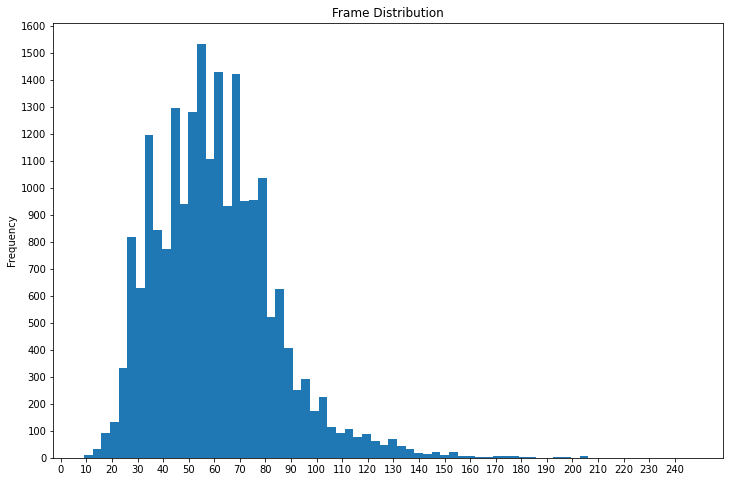

In [62]:

df_frame.frame_no.plot(kind='hist', bins = 70, 
            figsize=(12,8), 
            xticks = range(0,250,10),
            yticks = range(0,1700,100),
            xlabel = 'number of frame',
            ylabel = 'number of video'
            )
plt.title('Frame Distribution')
# plt.grid(ls='-.', color = 'pink')
plt.show()

In [66]:
df_frame[df_frame['frame_no']<20]

,path,frame_no
505,./data/truth/59841.mp4,13.0
829,./data/article/03492.mp4,14.0
842,./data/fact/20743.mp4,16.0
976,./data/japan/30938.mp4,18.0
1186,./data/staff/54259.mp4,17.0
...,...,...
19663,./data/cannot/08972.mp4,19.0
19674,./data/necklace/37857.mp4,14.0
20186,./data/safe/48998.mp4,19.0
20193,./data/corn/13330.mp4,15.0


In [69]:
df_frame.path.str.split('/')

0        [., data, enter, 19328.mp4]
1        [., data, enter, 19326.mp4]
2        [., data, enter, 19325.mp4]
3        [., data, enter, 19331.mp4]
4        [., data, enter, 19327.mp4]
                    ...             
21078     [., data, turn, 59969.mp4]
21079     [., data, turn, 59996.mp4]
21080     [., data, turn, 66684.mp4]
21081     [., data, turn, 59992.mp4]
21082     [., data, turn, 59989.mp4]
Name: path, Length: 21083, dtype: object

In [80]:
def add_col(row):
    gloss = row['path'].split('/')[2]
    return gloss

def add_col(row):
    video_id = row['path'].split('/')[3]
    return video_id

df_frame['video_id'] = df_frame.apply(add_col, axis=1)
df_frame['gloss'] = df_frame.apply(add_col, axis=1)


In [83]:
df_frame.head()

,path,frame_no,gloss,video_id
0,./data/enter/19328.mp4,78.0,enter,19328.mp4
1,./data/enter/19326.mp4,50.0,enter,19326.mp4
2,./data/enter/19325.mp4,27.0,enter,19325.mp4
3,./data/enter/19331.mp4,83.0,enter,19331.mp4
4,./data/enter/19327.mp4,68.0,enter,19327.mp4


<AxesSubplot:ylabel='gloss'>

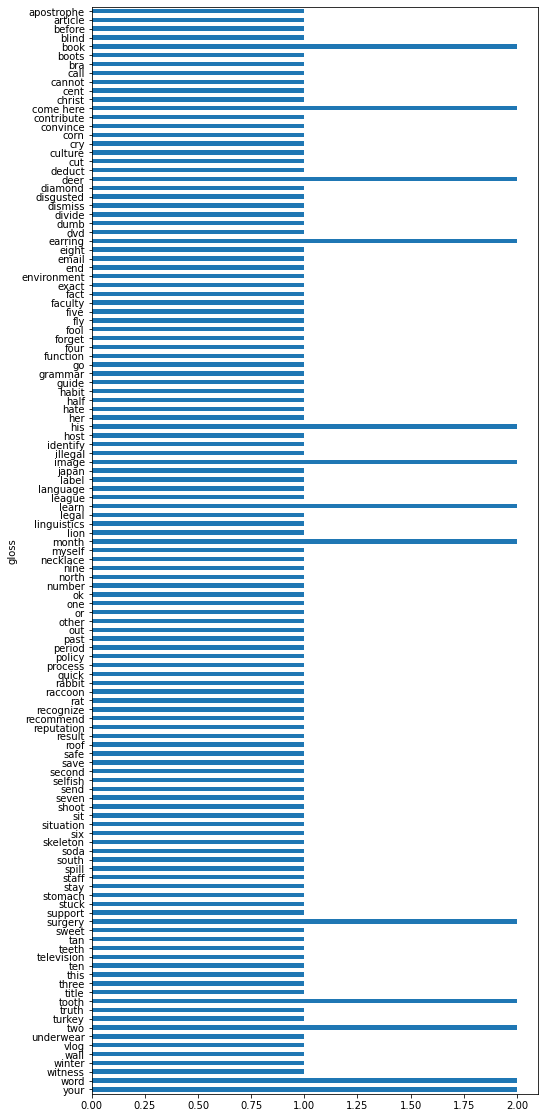

In [90]:
df_frame[df_frame['frame_no'] < 20].groupby('gloss')['video_id'].count().sort_index(ascending=False).plot(kind = 'barh', figsize = (8,20))

In [102]:
# get number of video per gloss
df_gloss = df_frame.groupby('gloss')['video_id'].count().reset_index()
df_gloss.columns = ['gloss', 'no_video']
df_gloss.head()

,gloss,no_video
0,a,8
1,a lot,8
2,abdomen,8
3,able,8
4,about,15


In [103]:
df = pd.merge(df_frame,df_gloss,on='gloss',how='left')
df

,path,frame_no,gloss,video_id,no_video_x,no_video_y,no_video
0,./data/enter/19328.mp4,78.0,enter,19328.mp4,12,12,12
1,./data/enter/19326.mp4,50.0,enter,19326.mp4,12,12,12
2,./data/enter/19325.mp4,27.0,enter,19325.mp4,12,12,12
3,./data/enter/19331.mp4,83.0,enter,19331.mp4,12,12,12
4,./data/enter/19327.mp4,68.0,enter,19327.mp4,12,12,12
...,...,...,...,...,...,...,...
21078,./data/turn/59969.mp4,41.0,turn,59969.mp4,7,7,7
21079,./data/turn/59996.mp4,62.0,turn,59996.mp4,7,7,7
21080,./data/turn/66684.mp4,66.0,turn,66684.mp4,7,7,7
21081,./data/turn/59992.mp4,38.0,turn,59992.mp4,7,7,7


In [107]:
df.head()

,path,frame_no,gloss,video_id,no_video
0,./data/enter/19328.mp4,78.0,enter,19328.mp4,12
1,./data/enter/19326.mp4,50.0,enter,19326.mp4,12
2,./data/enter/19325.mp4,27.0,enter,19325.mp4,12
3,./data/enter/19331.mp4,83.0,enter,19331.mp4,12
4,./data/enter/19327.mp4,68.0,enter,19327.mp4,12


In [108]:
df[df['frame_no'] < 20]

,path,frame_no,gloss,video_id,no_video
505,./data/truth/59841.mp4,13.0,truth,59841.mp4,7
829,./data/article/03492.mp4,14.0,article,03492.mp4,8
842,./data/fact/20743.mp4,16.0,fact,20743.mp4,11
976,./data/japan/30938.mp4,18.0,japan,30938.mp4,13
1186,./data/staff/54259.mp4,17.0,staff,54259.mp4,11
...,...,...,...,...,...
19663,./data/cannot/08972.mp4,19.0,cannot,08972.mp4,7
19674,./data/necklace/37857.mp4,14.0,necklace,37857.mp4,13
20186,./data/safe/48998.mp4,19.0,safe,48998.mp4,8
20193,./data/corn/13330.mp4,15.0,corn,13330.mp4,19


In [138]:
df.loc[0]['path']

'./data/enter/19328.mp4'

In [146]:
def video_size(row):
    video_path = row['path']
    vid = cv2.VideoCapture(video_path)
    height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
    size = (int(width), int(height))
    return size 

df['size'] = df.apply(video_size, axis = 1)

In [141]:
df.head()

,path,frame_no,gloss,video_id,no_video,size
0,./data/enter/19328.mp4,78.0,enter,19328.mp4,12,"(256.0, 256.0)"
1,./data/enter/19326.mp4,50.0,enter,19326.mp4,12,"(256.0, 256.0)"
2,./data/enter/19325.mp4,27.0,enter,19325.mp4,12,"(256.0, 256.0)"
3,./data/enter/19331.mp4,83.0,enter,19331.mp4,12,"(256.0, 256.0)"
4,./data/enter/19327.mp4,68.0,enter,19327.mp4,12,"(256.0, 256.0)"


In [143]:
df['size'].unique()

array([(256.0, 256.0)], dtype=object)

In [2]:
# Save object to file
def save_object(object_to_save, path='.', name='object_saved.pickle'):
    import pickle, os
    file_path = os.path.join(path, name)
    file_to_store = open(file_path, 'wb')
    pickle.dump(object_to_save, file_to_store, protocol=4)
    file_to_store.close()
    print(f'DONE! "{name}" saved!')

# load object from pickle file
def load_object(object_path):
    import pickle

    file_to_read = open(object_path, 'rb')
    object_loaded = pickle.load(file_to_read)
    file_to_read.close()
    print('DONE! Object loaded!')
    return object_loaded

# save_object(df, name = 'videos_info_dataframe.pickle')


In [6]:
df = load_object('./videos_info_dataframe.pickle')
df.head()

DONE! Object loaded!


,path,frame_no,gloss,video_id,no_video,size
0,./data/enter/19328.mp4,78.0,enter,19328.mp4,12,"(256, 256)"
1,./data/enter/19326.mp4,50.0,enter,19326.mp4,12,"(256, 256)"
2,./data/enter/19325.mp4,27.0,enter,19325.mp4,12,"(256, 256)"
3,./data/enter/19331.mp4,83.0,enter,19331.mp4,12,"(256, 256)"
4,./data/enter/19327.mp4,68.0,enter,19327.mp4,12,"(256, 256)"


## Open video file:

In [133]:
def draw_styled_landmarks(image, results):
    # Draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                mp_drawing.DrawingSpec(color=(114, 231, 81), thickness=1, circle_radius=1), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 102, 153), thickness=1, circle_radius=1)) # change style for lines

    # Draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 22, 81), thickness=1, circle_radius=1), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 50, 153), thickness=1, circle_radius=1)) # change style for lines  
    
    # Draw left hand connection    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 77, 81), thickness=1, circle_radius=1), # change style for dots
                                mp_drawing.DrawingSpec(color=(173, 140, 153), thickness=1, circle_radius=1)) # change style for lines

    # Draw right hand connection     
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(114, 240, 81), thickness=1, circle_radius=1), # change style for dots
                                mp_drawing.DrawingSpec(color=(51, 20, 15), thickness=1, circle_radius=1)) # change style for lines 


In [145]:
cap = cv2.VideoCapture('./data/action/00858.mp4')

# Set mediapipe model:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        while cap.isOpened():

            # Read frame
            rec, frame = cap.read()

            # Make prediction:
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks:
            draw_styled_landmarks(image, results)

            # Show screen
            cv2.imshow('webcam', image)

            # Press ESC key to exit screen
            key = cv2.waitKey(1)
            if key == 27:
                break
    except:
        cap.release()
        cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to target thread (0x55734e09bb60)

QObject::moveToThread: Current thread (0x55734e09bb60) is not the object's thread (0x55734e2fbc60).
Cannot move to tar